In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Understanding

In [4]:
# Loading data to dataframe
data = pd.read_csv('noshow data.csv')

In [5]:
data

,PatientId,AppointmentID,Age,Gender,AppointmentDay,Month,Calling_time (hour in a day),Waiting_time (minute),Financial_aid,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,time_b_appointment (day),Show.up
0,2.263866e+07,5580835,22,F,Tuesday,5,7,19,0,0,0,0,0,1,0,yes
1,2.263866e+07,5715081,23,F,Wednesday,6,13,21,0,0,0,0,0,1,36,yes
2,5.216894e+07,5704816,28,F,Monday,5,16,0,0,0,0,0,0,0,0,yes
3,5.216894e+07,5607220,28,F,Tuesday,5,11,27,0,0,0,0,0,0,1,yes
4,6.485121e+07,5683383,29,F,Friday,5,7,2,0,0,0,0,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72602,1.000000e+15,5616762,90,M,Wednesday,5,14,9,0,0,0,0,0,1,0,yes
72603,1.000000e+15,5710157,90,M,Tuesday,5,15,0,0,0,0,0,0,0,13,yes
72604,1.000000e+15,5700484,90,M,Tuesday,5,9,1,0,0,0,0,0,0,0,yes
72605,1.000000e+15,5736368,90,M,Wednesday,5,8,0,0,0,0,0,0,0,8,yes


## Data Cleaning & Feature Engineering

### General Checks

In [6]:
data.describe()

,PatientId,AppointmentID,Age,Month,Calling_time (hour in a day),Waiting_time (minute),Financial_aid,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,time_b_appointment (day)
count,7.260700e+04,7.260700e+04,72607.000000,72607.000000,72607.000000,72607.000000,72607.000000,72607.000000,72607.000000,72607.000000,72607.000000,72607.000000,72607.000000
mean,1.474600e+14,5.678657e+06,37.247910,5.207019,10.880907,9.252662,0.104026,0.197281,0.073147,0.034625,0.021816,0.313634,5.620298
std,2.565200e+14,6.759469e+04,22.723062,0.470888,3.230154,14.017053,0.305296,0.397949,0.260380,0.182829,0.146084,0.463973,8.198358
min,2.263866e+07,5.030230e+06,0.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.644562e+06,18.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.160000e+13,5.682686e+06,37.000000,5.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.390000e+13,5.726350e+06,55.000000,5.000000,14.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000
max,1.000000e+15,5.790481e+06,115.000000,6.000000,20.000000,179.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.000000


In [7]:
### check dtypes and for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72607 entries, 0 to 72606
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PatientId                     72607 non-null  float64
 1   AppointmentID                 72607 non-null  int64  
 2   Age                           72607 non-null  int64  
 3   Gender                        72607 non-null  object 
 4   AppointmentDay                72607 non-null  object 
 5   Month                         72607 non-null  int64  
 6   Calling_time (hour in a day)  72607 non-null  int64  
 7   Waiting_time (minute)         72607 non-null  int64  
 8   Financial_aid                 72607 non-null  int64  
 9   Hypertension                  72607 non-null  int64  
 10  Diabetes                      72607 non-null  int64  
 11  Alcoholism                    72607 non-null  int64  
 12  Handicap                      72607 non-null  int64  
 13  S

In [8]:
### all appointment ids are unique!
data.AppointmentID.value_counts()

5770094    1
5739175    1
5659275    1
5745312    1
5743265    1
          ..
5639531    1
5768554    1
5774697    1
5772648    1
5636096    1
Name: AppointmentID, Length: 72607, dtype: int64

### Recoding

In [16]:
### Cast target and gender feature as binaries
### Yes = 1
### F = 1
data['Show.up'] = pd.get_dummies(data['Show.up'])

In [17]:
data['Gender'] = pd.get_dummies(data['Gender'])

In [23]:
# Female = 1, Male = 0
data['Gender'] = pd.get_dummies(data['Gender'])

In [19]:
### create feature for no. of conditions 
data['total_conditions'] = data['Hypertension']+data['Diabetes']+data['Alcoholism']+data['Handicap']
data.total_conditions.unique()
data['total_conditions'].value_counts()

0    54959
1    12002
2     5217
3      419
4       10
Name: total_conditions, dtype: int64

In [20]:
# Sunday = 1
data['AppointmentDay'] = np.where((data.AppointmentDay == 'Sunday'), 1, data.AppointmentDay)

# Monday = 2
data['AppointmentDay'] = np.where((data.AppointmentDay == 'Monday'), 2, data.AppointmentDay)

# Tuesday = 3
data['AppointmentDay'] = np.where((data.AppointmentDay == 'Tuesday'), 3, data.AppointmentDay)

# Wednesday = 4
data['AppointmentDay'] = np.where((data.AppointmentDay == 'Wednesday'), 4, data.AppointmentDay)

# Thursday = 5
data['AppointmentDay'] = np.where((data.AppointmentDay == 'Thursday'), 5, data.AppointmentDay)

# Friday = 6
data['AppointmentDay'] = np.where((data.AppointmentDay == 'Friday'), 6, data.AppointmentDay)

# Saturday = 7
data['AppointmentDay'] = np.where((data.AppointmentDay == 'Saturday'), 7, data.AppointmentDay)

In [21]:
data['AppointmentDay'].value_counts()

4    17028
3    16835
2    14955
6    12609
5    11161
7       19
Name: AppointmentDay, dtype: int64

In [29]:
df = data
df

,PatientId,AppointmentID,Age,Gender,AppointmentDay,Month,Calling_time (hour in a day),Waiting_time (minute),Financial_aid,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,time_b_appointment (day),Show.up,total_conditions
0,2.263866e+07,5580835,22,1,3,5,7,19,0,0,0,0,0,1,0,1,0
1,2.263866e+07,5715081,23,1,4,6,13,21,0,0,0,0,0,1,36,1,0
2,5.216894e+07,5704816,28,1,2,5,16,0,0,0,0,0,0,0,0,1,0
3,5.216894e+07,5607220,28,1,3,5,11,27,0,0,0,0,0,0,1,1,0
4,6.485121e+07,5683383,29,1,6,5,7,2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72602,1.000000e+15,5616762,90,0,4,5,14,9,0,0,0,0,0,1,0,1,0
72603,1.000000e+15,5710157,90,0,3,5,15,0,0,0,0,0,0,0,13,1,0
72604,1.000000e+15,5700484,90,0,3,5,9,1,0,0,0,0,0,0,0,1,0
72605,1.000000e+15,5736368,90,0,4,5,8,0,0,0,0,0,0,0,8,1,0


In [30]:
# Full Columns Name
df.columns

Index(['PatientId', 'AppointmentID', 'Age', 'Gender', 'AppointmentDay',
       'Month', 'Calling_time (hour in a day)', 'Waiting_time (minute)',
       'Financial_aid', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'time_b_appointment (day)', 'Show.up',
       'total_conditions'],
      dtype='object')

### Dropping redundant features 

In [31]:
df = df.drop(['PatientId','AppointmentID'], axis = 1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72607 entries, 0 to 72606
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           72607 non-null  int64 
 1   Gender                        72607 non-null  uint8 
 2   AppointmentDay                72607 non-null  object
 3   Month                         72607 non-null  int64 
 4   Calling_time (hour in a day)  72607 non-null  int64 
 5   Waiting_time (minute)         72607 non-null  int64 
 6   Financial_aid                 72607 non-null  int64 
 7   Hypertension                  72607 non-null  int64 
 8   Diabetes                      72607 non-null  int64 
 9   Alcoholism                    72607 non-null  int64 
 10  Handicap                      72607 non-null  int64 
 11  SMS_received                  72607 non-null  int64 
 12  time_b_appointment (day)      72607 non-null  int64 
 13  Show.up         

In [33]:
df.columns = ['age', 'gender', 'app_day', 'month','calling_time_hour','waiting_time_minute', 'financial_aid', 'hypertension', 'diabetes','alcoholism', 'Handicap',
             'sms_received', 'day_before_app', 'show_up', 'total_conditions']

In [34]:
df['gender'] = df['gender'].astype(int)
df['app_day'] = df['app_day'].astype(int)
df['show_up'] = df['show_up'].astype(int)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72607 entries, 0 to 72606
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  72607 non-null  int64
 1   gender               72607 non-null  int64
 2   app_day              72607 non-null  int64
 3   month                72607 non-null  int64
 4   calling_time_hour    72607 non-null  int64
 5   waiting_time_minute  72607 non-null  int64
 6   financial_aid        72607 non-null  int64
 7   hypertension         72607 non-null  int64
 8   diabetes             72607 non-null  int64
 9   alcoholism           72607 non-null  int64
 10  Handicap             72607 non-null  int64
 11  sms_received         72607 non-null  int64
 12  day_before_app       72607 non-null  int64
 13  show_up              72607 non-null  int64
 14  total_conditions     72607 non-null  int64
dtypes: int64(15)
memory usage: 8.3 MB


### Save File

In [36]:
import pickle
df.to_pickle('df.pickle')

### Data Visualization

In [8]:
# Learn the size of the dataset
n_rows = df.shape[0]
n_cols = df.shape[1]
print('The dataset has', n_rows, 'rows and', n_cols, 'features')

The dataset has 72607 rows and 16 features


In [101]:
# Missing appointment before will influnces on missing appointment again on the future?
data["Show.up"]= data["Show.up"].replace({"yes":1})
data["Show.up"]= data["Show.up"].replace({"no":0})

# How many percentage missing appoiment nfeore will affect on missing appoiment again?
missed_appointment = data.groupby('PatientId')['Show.up'].sum()
missed_appointment = missed_appointment.to_dict()
data['missed_appointment_before'] = data.PatientId.map(lambda x: 1 if missed_appointment[x]>0 else 0)
data['missed_appointment_before'].corr(data['Show.up'])

0.09246263682400699

Proportion of the dataset that are women: 68.0%
Proportion of the dataset that are men: 32.0%


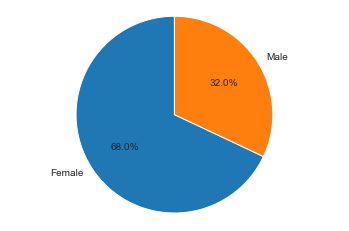

In [102]:
# Percentage of Gender in the dataset:
# Drop PatientId column because it contains duplicate values
patients = data.drop_duplicates(subset=['PatientId'])
n_patients = patients.shape[0]
count = patients.Gender.value_counts()
n_women = count.values[0]
n_men = count.values[1]
print('Proportion of the dataset that are women: {0:2.1f}%'.format(100*n_women/n_patients))
print('Proportion of the dataset that are men: {0:2.1f}%'.format(100*n_men/n_patients))

#Pie Chart to show Gender
labels = 'Female', 'Male'
sizes = [n_women, n_men]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

Percentage of persons that do not miss appointments: 79.06%
Percentage of persons that miss appointments: 20.94%


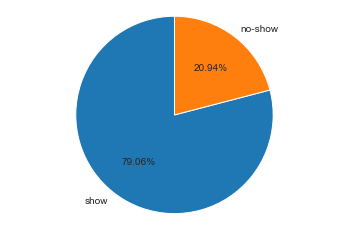

In [103]:
# Percentage of patient who do not miss appointment vs miss appoinment:
show = data[data['Show.up']==1]
no_show = data[data['Show.up']==0]
n_show = show.shape[0]
n_no_show = no_show.shape[0]
print('Percentage of persons that do not miss appointments:{0: 2.2f}%'.format(100*n_show/n_rows))
print('Percentage of persons that miss appointments:{0: 2.2f}%'.format(100*n_no_show/n_rows))

#Pie Chart to show "show" and "no-show":
labels = 'show', 'no-show'
sizes = [n_show, n_no_show]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
ax1.axis('equal')
plt.show()

In [104]:
#Age:
def map_age(x):
    '''
    Receives an integer and returns the age category that this age is in.
    '''
    if x < 12:
        return 'Child'
    elif x > 12 and x < 18:
        return 'Teenager'
    elif x>=20 and x<25:
        return 'Young Adult'
    elif x>=25 and x<60:
        return 'Adult'
    else:
        return 'Senior'
    
data['mapped_Age'] = data['Age'].map(lambda x: map_age(x))
patients['mapped_Age'] = patients['Age'].map(lambda x: map_age(x))

<ipython-input-104-f275b13ae36c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patients['mapped_Age'] = patients['Age'].map(lambda x: map_age(x))


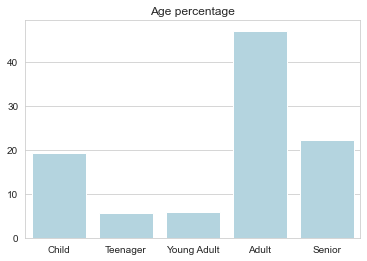

In [105]:
ages = ['Child','Teenager','Young Adult','Adult','Senior']
n_patients = patients.shape[0]
grouped = patients.groupby(by='mapped_Age')
count_ages = grouped.Age.count().reindex(index = ages)
g = sns.barplot(x=count_ages.index, y=count_ages.values*(100/n_patients), color='lightblue');
g.set_title('Age percentage');
g.set_xlabel('');

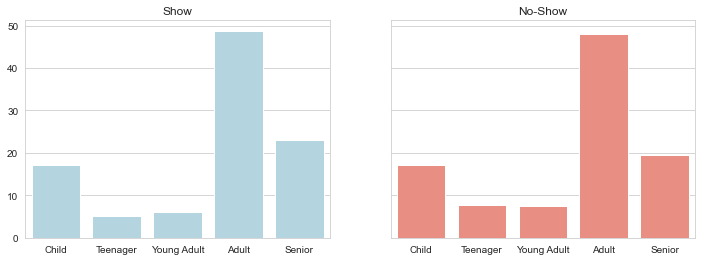

In [106]:
show = data[data['Show.up']==1]
no_show = data[data['Show.up']==0]
n_show = show.shape[0]
n_no_show = no_show.shape[0]
ages = ['Child','Teenager','Young Adult','Adult','Senior']

# count ages for group which didnt miss appointment
grouped = show.groupby(by='mapped_Age')
count_ages1 = grouped.Age.count().reindex(index = ages)
count_ages1 = count_ages1*(100/show.shape[0])

# count ages for group which missed appointment
grouped = no_show.groupby(by='mapped_Age')
count_ages2 = grouped.Age.count().reindex(index = ages)
count_ages2 = count_ages2*(100/no_show.shape[0])

sns.set_style("whitegrid")
f, ax = plt.subplots(1, 2,figsize=(12, 4),sharey=True)
g1 = sns.barplot(x=count_ages1.index, y=count_ages1.values, 
            color='lightblue',ax=ax[0])
g1.set_xlabel('');
g1.set_title('Show');
g2 = sns.barplot(x=count_ages2.index, y=count_ages2.values, 
            color='salmon',ax=ax[1]);
g2.set_xlabel('');
g2.set_title('No-Show');

In [107]:
patients = data.drop_duplicates(subset=['PatientId'])
patients[['Hypertension','Diabetes','Alcoholism','Handicap']].sum(axis=0)/patients.shape[0]

Hypertension    0.189776
Diabetes        0.070495
Alcoholism      0.026611
Handicap        0.018674
dtype: float64

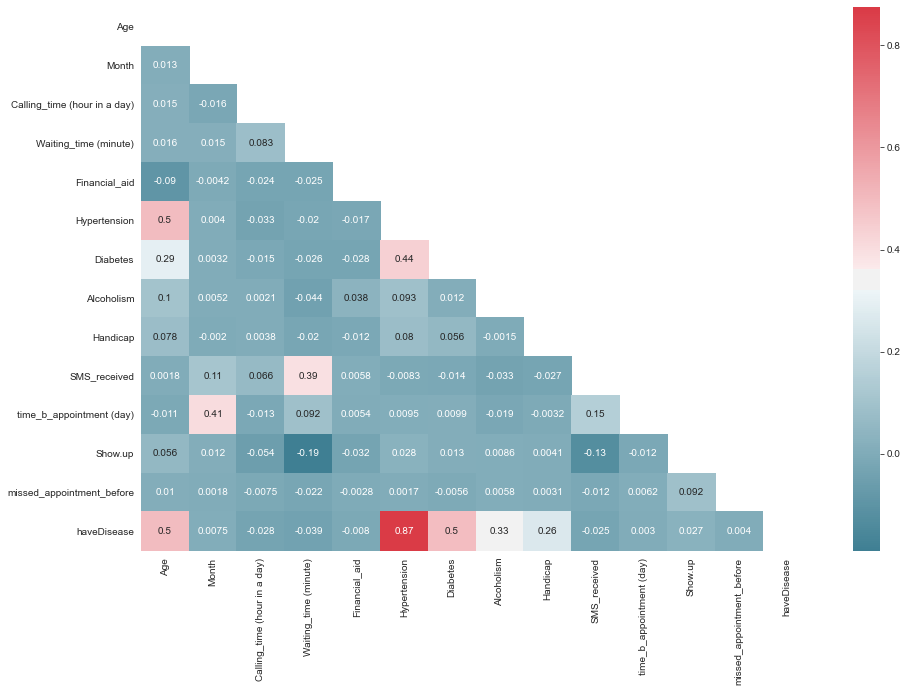

In [108]:
data['haveDisease'] = data.Alcoholism | data.Handicap | data.Diabetes | data.Hypertension
fig, ax = plt.subplots(figsize=[15,10])
data = data.drop(columns=['AppointmentID', 'PatientId'])
cor=data.corr()
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, 
            annot=True, cmap=cmap, mask=mask);